In [1]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [2]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('../images') if isfile(join('../images', f))])

In [3]:
def bound_box(image_path):
    # load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    """print(image.shape)
    plt.imshow(gray, 'gray')"""

    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction using OpenCV 2.4
    ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
    gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)

    #image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

    """plt.figure()
    plt.imshow(image_horizontal_derivative, 'gray')"""
    
    ret2,thresh = cv2.threshold(gradient,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (20, 20))
    #closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 20))
    closed1 = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
    opened1 = cv2.morphologyEx(closed1, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 1))
    dilated = cv2.dilate(opened1, kernel, iterations=5)
    
    cnts = cv2.findContours(opened1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    #print(rect)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    # draw a bounding box arounded the detected barcode and display the
    # image
    image_bb = image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    print(coordinates_source)
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    # Computing the trasformation, i.e. homography. Warping.
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    # Applying the trasformation
    gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray1, 'gray')

[[ 412.  256.]
 [1275.  252.]
 [ 417. 1134.]
 [1280. 1130.]]
Wall time: 300 ms


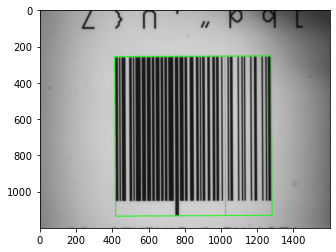

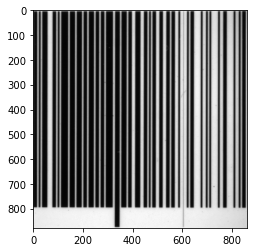

In [4]:
%%time
bound_box(f'../images/{images_paths[0]}')

[[ 361.  282.]
 [1227.  282.]
 [ 361. 1089.]
 [1227. 1089.]]
Wall time: 263 ms


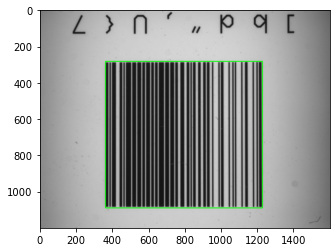

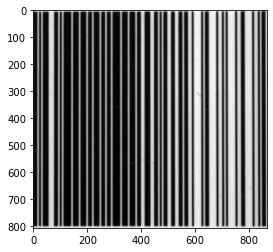

In [5]:
%%time
bound_box(f'../images/{images_paths[1]}')

[[ 211.  239.]
 [1023.  232.]
 [ 215.  769.]
 [1027.  763.]]
Wall time: 200 ms


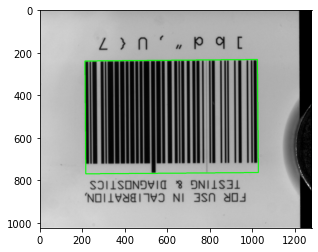

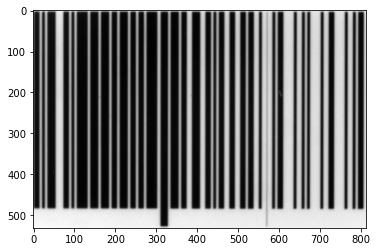

In [6]:
%%time
bound_box(f'../images/{images_paths[2]}')

[[142. 254.]
 [953. 254.]
 [142. 745.]
 [953. 745.]]
Wall time: 197 ms


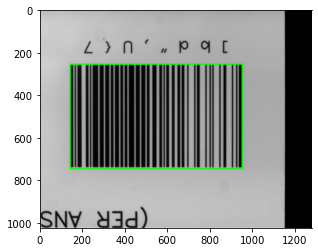

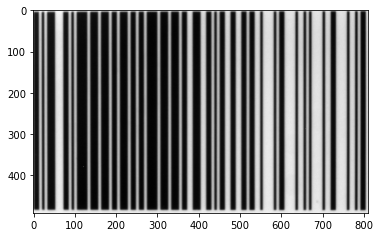

In [7]:
%%time
bound_box(f'../images/{images_paths[3]}')

[[347. 167.]
 [884. 167.]
 [347. 733.]
 [884. 733.]]
Wall time: 206 ms


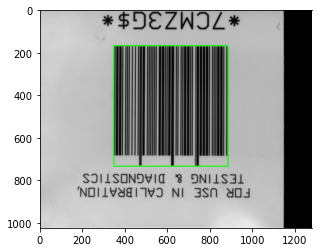

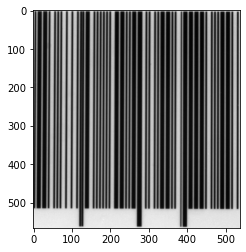

In [8]:
%%time
bound_box(f'../images/{images_paths[4]}')

[[355. 246.]
 [895. 246.]
 [355. 769.]
 [895. 769.]]


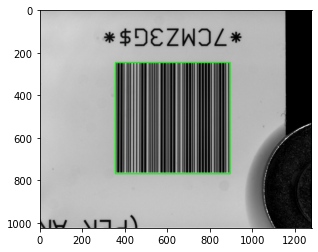

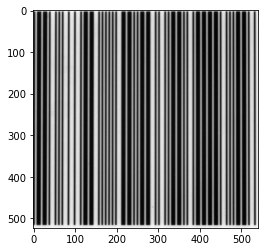

In [9]:
bound_box(f'../images/{images_paths[5]}')

[[ 177.  283.]
 [1084.  283.]
 [ 177.  850.]
 [1084.  850.]]


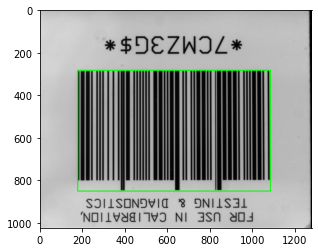

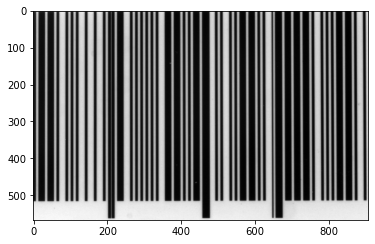

In [10]:
bound_box(f'../images/{images_paths[6]}')

[[ 164.  270.]
 [1075.  272.]
 [ 163.  793.]
 [1074.  794.]]


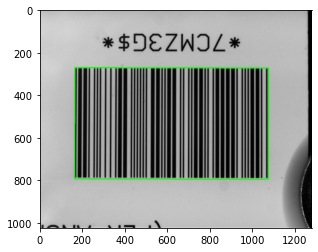

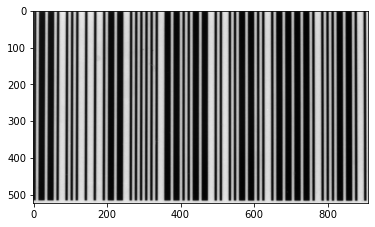

In [11]:
bound_box(f'../images/{images_paths[7]}')

[[ 164.  270.]
 [1075.  272.]
 [ 163.  793.]
 [1074.  794.]]


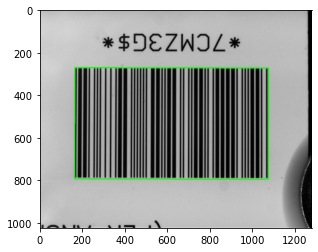

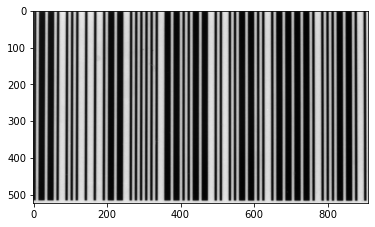

In [12]:
bound_box(f'../images/{images_paths[7]}')

[[344. 332.]
 [957. 338.]
 [339. 782.]
 [953. 788.]]


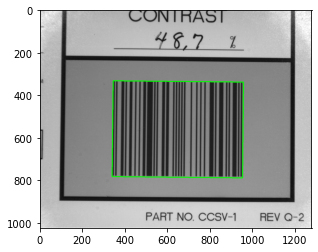

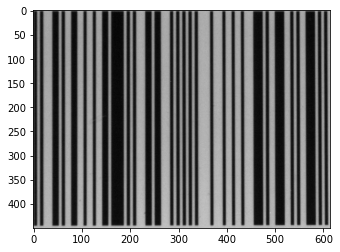

In [13]:
bound_box(f'../images/{images_paths[8]}')

[[355. 252.]
 [963. 260.]
 [349. 724.]
 [957. 732.]]


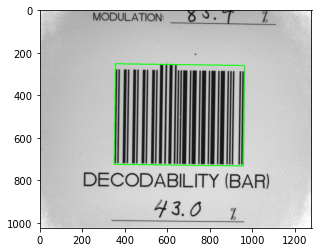

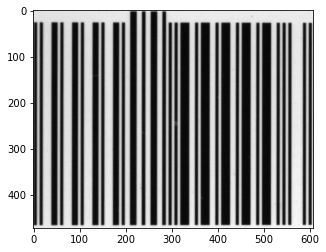

In [14]:
bound_box(f'../images/{images_paths[9]}')

In [15]:
print(f'../images/{images_paths[10]}')

images/EAN-UPC-DEFECTS IMGB.BMP


In [16]:
#bound_box(f'../images/{images_paths[10]}')

[[271. 282.]
 [937. 278.]
 [274. 761.]
 [940. 757.]]


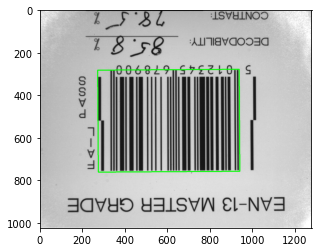

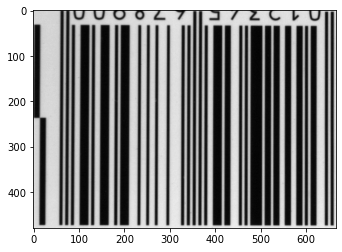

In [17]:
bound_box(f'../images/{images_paths[11]}')

In [18]:
#bound_box(f'../images/{images_paths[12]}')

[[ 111.  116.]
 [1278.  118.]
 [ 110.  314.]
 [1277.  316.]]


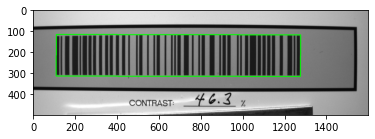

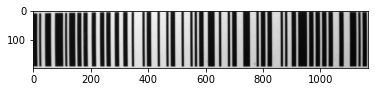

In [19]:
bound_box(f'../images/{images_paths[13]}')

[[ 111.  116.]
 [1278.  118.]
 [ 110.  314.]
 [1277.  316.]]


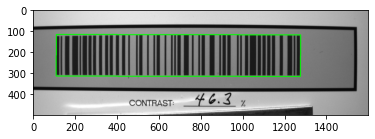

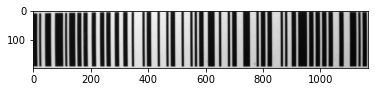

In [20]:
bound_box(f'../images/{images_paths[13]}')

[[ 174.  142.]
 [1335.  142.]
 [ 174.  341.]
 [1335.  341.]]


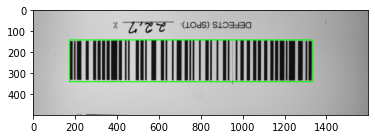

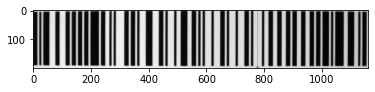

In [21]:
bound_box(f'../images/{images_paths[14]}')

[[ 174.  142.]
 [1335.  142.]
 [ 174.  341.]
 [1335.  341.]]


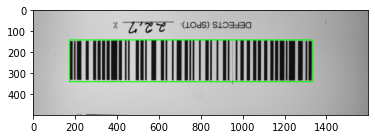

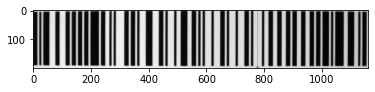

In [22]:
bound_box(f'../images/{images_paths[14]}')

[[ 187.  165.]
 [1367.  151.]
 [ 190.  366.]
 [1370.  352.]]


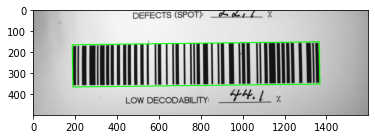

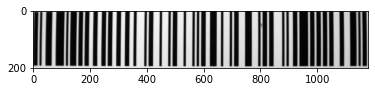

In [23]:
bound_box(f'../images/{images_paths[15]}')

[[ 187.  165.]
 [1367.  151.]
 [ 190.  366.]
 [1370.  352.]]


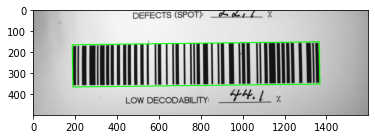

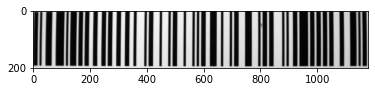

In [24]:
bound_box(f'../images/{images_paths[15]}')

[[ 165.  137.]
 [1433.  138.]
 [ 165.  336.]
 [1433.  336.]]


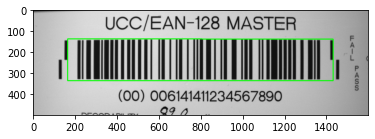

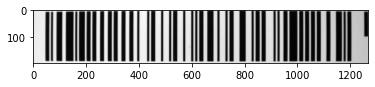

In [25]:
bound_box(f'../images/{images_paths[16]}')

[[ 208.  143.]
 [1335.  122.]
 [ 213.  389.]
 [1339.  367.]]


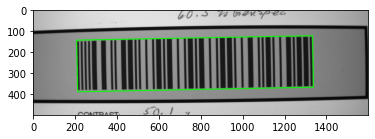

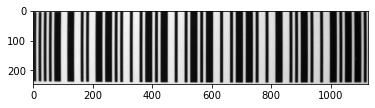

In [26]:
bound_box(f'../images/{images_paths[17]}')

[[ 208.  143.]
 [1335.  122.]
 [ 213.  389.]
 [1339.  367.]]


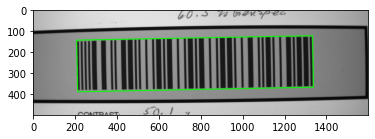

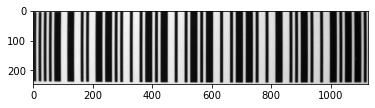

In [27]:
bound_box(f'../images/{images_paths[17]}')

[[ 210.  126.]
 [1341.  116.]
 [ 212.  373.]
 [1343.  363.]]


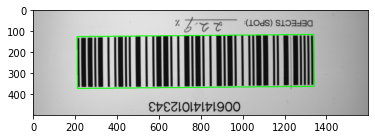

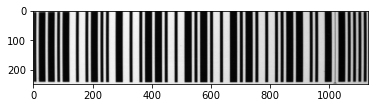

In [28]:
bound_box(f'../images/{images_paths[18]}')

[[ 210.  126.]
 [1341.  116.]
 [ 212.  373.]
 [1343.  363.]]


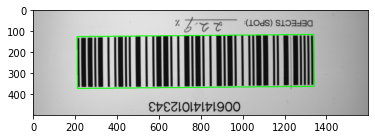

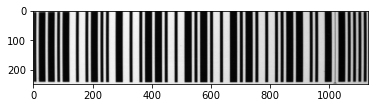

In [29]:
bound_box(f'../images/{images_paths[18]}')

[[ 243.   56.]
 [1370.   57.]
 [ 242.  301.]
 [1369.  303.]]


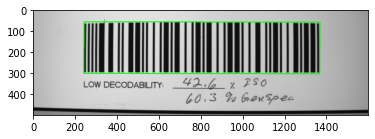

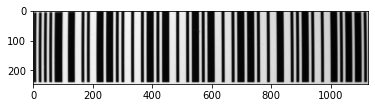

In [30]:
bound_box(f'../images/{images_paths[19]}')

[[ 243.   56.]
 [1370.   57.]
 [ 242.  301.]
 [1369.  303.]]


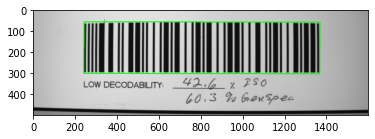

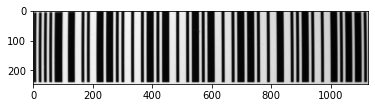

In [31]:
bound_box(f'../images/{images_paths[19]}')

[[ 260.  140.]
 [1391.  126.]
 [ 263.  387.]
 [1394.  373.]]


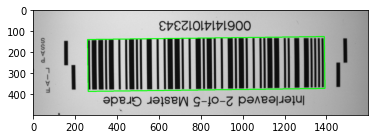

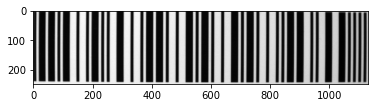

In [32]:
bound_box(f'../images/{images_paths[20]}')

In [33]:
print(f'../images/{images_paths[21]}')

images/TestChart.xls


In [34]:
#bound_box(f'../images/{images_paths[21]}')

[[190. 211.]
 [871. 205.]
 [194. 647.]
 [876. 640.]]


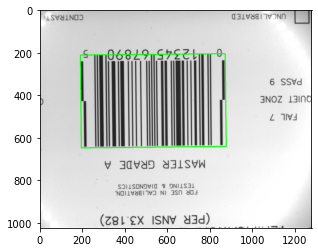

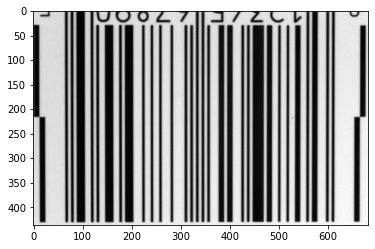

In [35]:
bound_box(f'../images/{images_paths[22]}')

[[190. 211.]
 [871. 205.]
 [194. 647.]
 [876. 640.]]


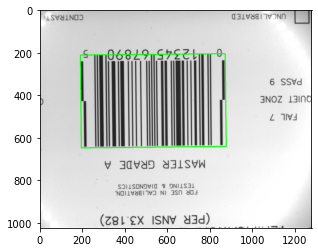

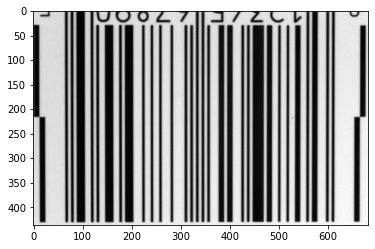

In [36]:
bound_box(f'../images/{images_paths[22]}')

[[326. 304.]
 [881. 310.]
 [322. 740.]
 [876. 746.]]


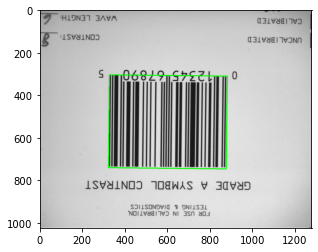

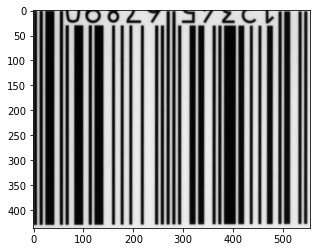

In [37]:
bound_box(f'../images/{images_paths[23]}')

[[360. 300.]
 [912. 310.]
 [352. 735.]
 [904. 744.]]


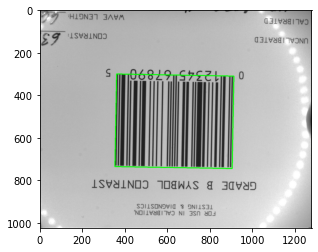

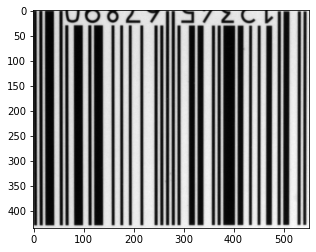

In [38]:
bound_box(f'../images/{images_paths[24]}')

[[368. 303.]
 [919. 306.]
 [366. 737.]
 [918. 739.]]


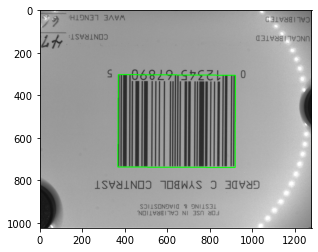

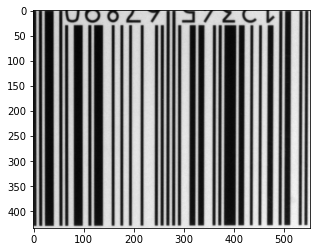

In [39]:
bound_box(f'../images/{images_paths[25]}')

[[303. 315.]
 [855. 326.]
 [294. 718.]
 [847. 729.]]


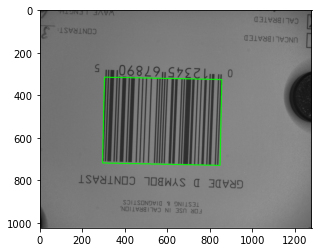

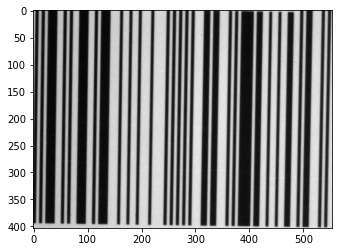

In [40]:
bound_box(f'../images/{images_paths[26]}')

[[345. 292.]
 [894. 301.]
 [337. 723.]
 [887. 732.]]


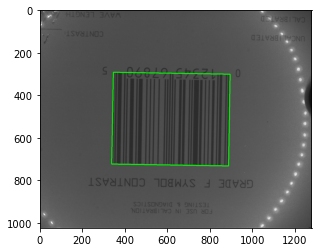

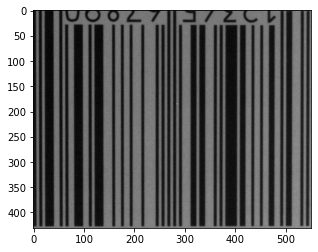

In [41]:
bound_box(f'../images/{images_paths[27]}')

[[338. 294.]
 [892. 301.]
 [332. 731.]
 [886. 738.]]


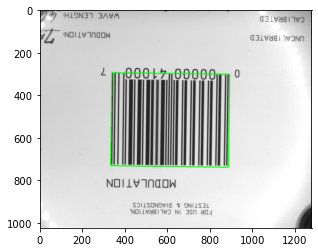

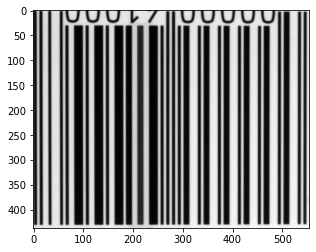

In [42]:
bound_box(f'../images/{images_paths[28]}')

[[337. 300.]
 [891. 309.]
 [330. 735.]
 [884. 745.]]


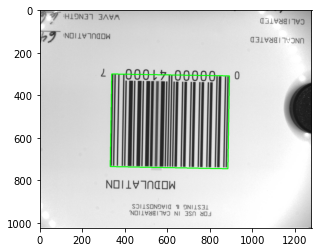

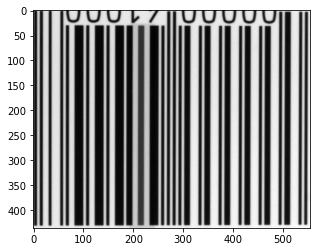

In [43]:
bound_box(f'../images/{images_paths[29]}')

[[335. 310.]
 [889. 321.]
 [326. 746.]
 [880. 757.]]


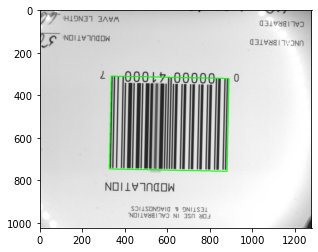

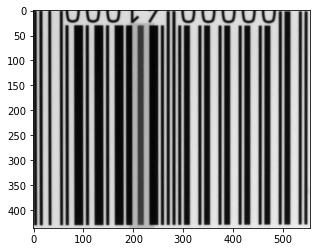

In [44]:
bound_box(f'../images/{images_paths[30]}')

[[343. 299.]
 [895. 315.]
 [330. 734.]
 [883. 750.]]


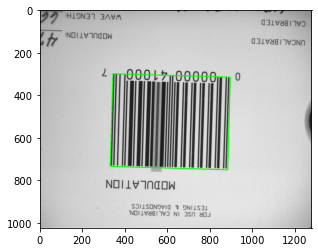

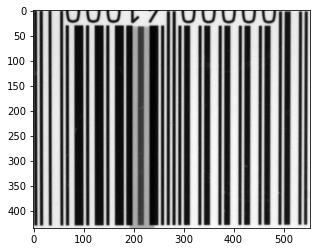

In [45]:
bound_box(f'../images/{images_paths[31]}')

[[344. 289.]
 [897. 289.]
 [344. 725.]
 [897. 725.]]


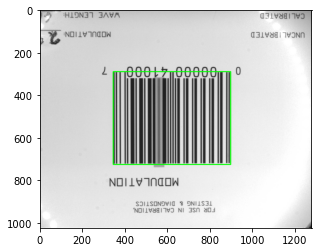

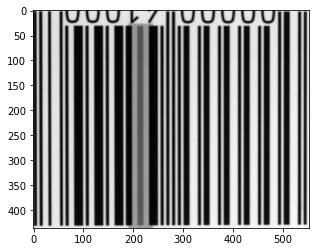

In [46]:
bound_box(f'../images/{images_paths[32]}')

[[356. 297.]
 [909. 302.]
 [352. 753.]
 [905. 759.]]


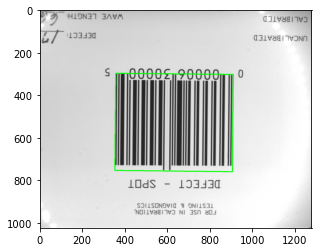

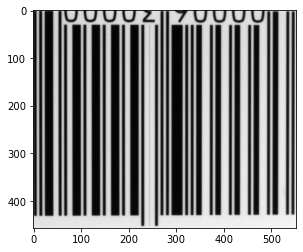

In [47]:
bound_box(f'../images/{images_paths[34]}')

[[355. 288.]
 [909. 296.]
 [349. 743.]
 [902. 751.]]


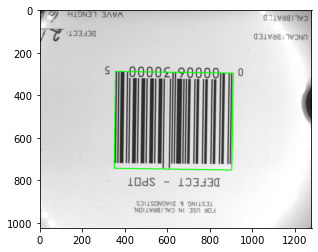

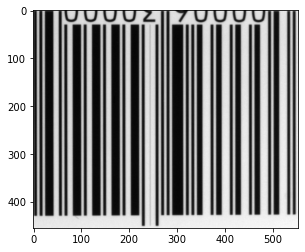

In [48]:
bound_box(f'../images/{images_paths[35]}')

[[343. 292.]
 [896. 292.]
 [343. 748.]
 [896. 748.]]


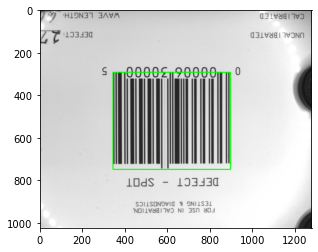

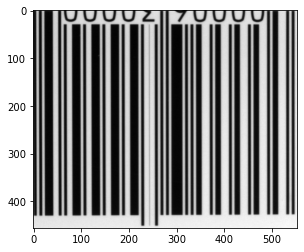

In [49]:
bound_box(f'../images/{images_paths[36]}')

[[330. 297.]
 [882. 298.]
 [330. 754.]
 [882. 754.]]


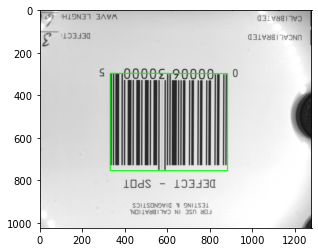

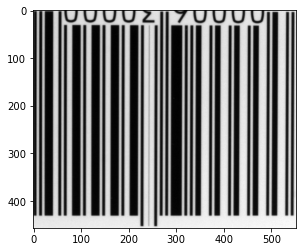

In [50]:
bound_box(f'../images/{images_paths[37]}')

[[342. 298.]
 [896. 300.]
 [341. 755.]
 [895. 756.]]


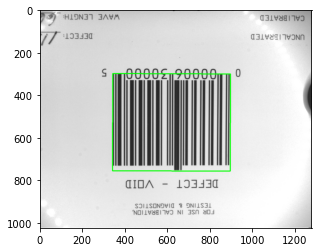

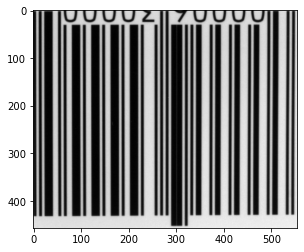

In [51]:
bound_box(f'../images/{images_paths[38]}')

[[346. 291.]
 [900. 297.]
 [341. 747.]
 [894. 753.]]


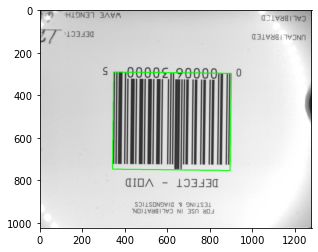

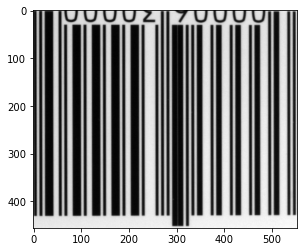

In [52]:
bound_box(f'../images/{images_paths[39]}')

[[310. 300.]
 [864. 303.]
 [308. 758.]
 [861. 761.]]


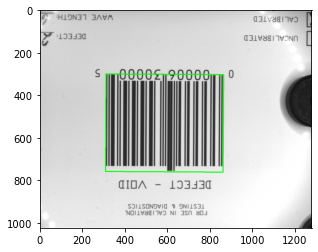

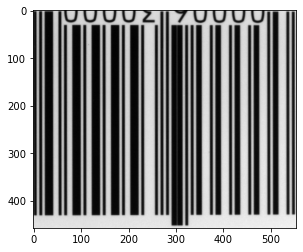

In [53]:
bound_box(f'../images/{images_paths[40]}')

[[300. 294.]
 [853. 291.]
 [302. 749.]
 [855. 747.]]


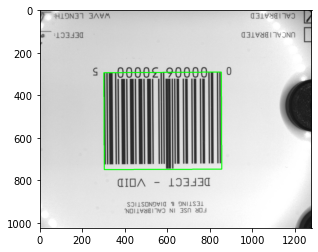

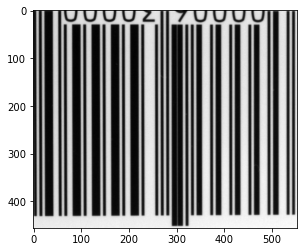

In [54]:
bound_box(f'../images/{images_paths[41]}')

[[298. 291.]
 [851. 291.]
 [298. 748.]
 [851. 748.]]


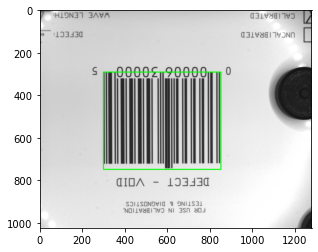

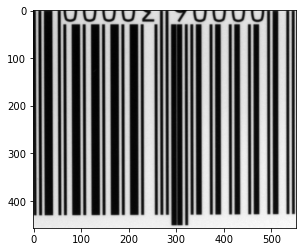

In [55]:
bound_box(f'../images/{images_paths[42]}')

[[292. 285.]
 [846. 285.]
 [292. 721.]
 [846. 721.]]


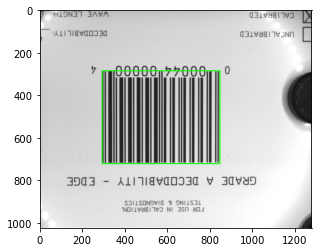

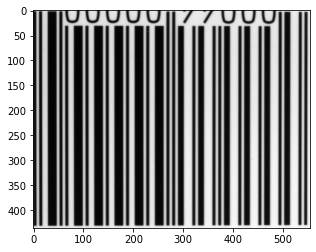

In [56]:
bound_box(f'../images/{images_paths[43]}')

[[292. 285.]
 [846. 285.]
 [292. 721.]
 [846. 721.]]


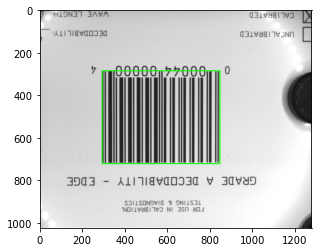

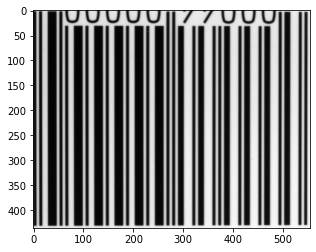

In [57]:
bound_box(f'../images/{images_paths[43]}')

[[301. 291.]
 [856. 294.]
 [299. 728.]
 [853. 731.]]


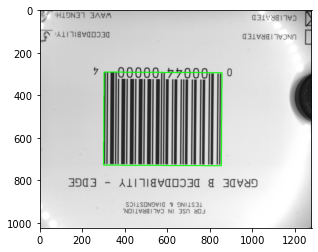

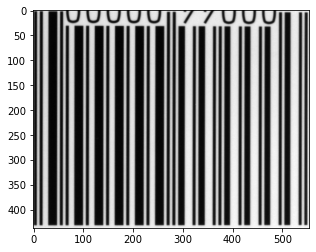

In [58]:
bound_box(f'../images/{images_paths[44]}')

[[291. 303.]
 [845. 306.]
 [288. 740.]
 [843. 743.]]


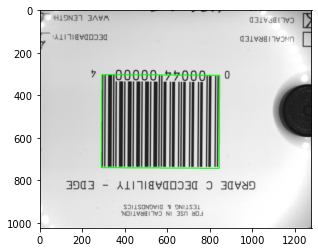

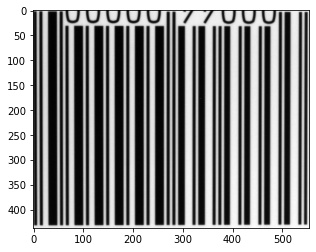

In [59]:
bound_box(f'../images/{images_paths[45]}')

[[275. 293.]
 [829. 301.]
 [269. 729.]
 [823. 737.]]


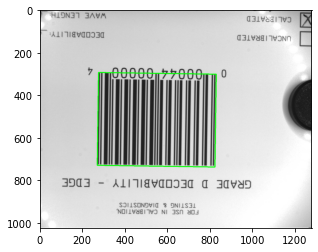

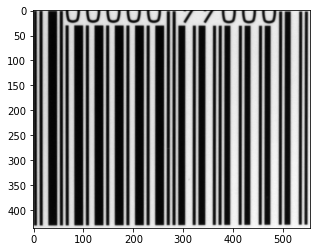

In [60]:
bound_box(f'../images/{images_paths[46]}')

[[269. 301.]
 [824. 306.]
 [265. 737.]
 [820. 742.]]


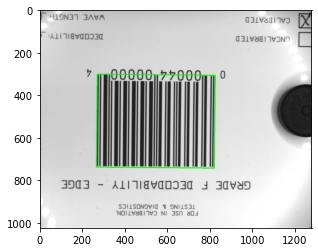

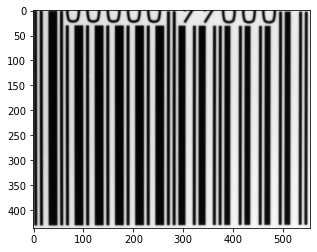

In [61]:
bound_box(f'../images/{images_paths[47]}')

[[263. 300.]
 [818. 308.]
 [257. 736.]
 [812. 743.]]


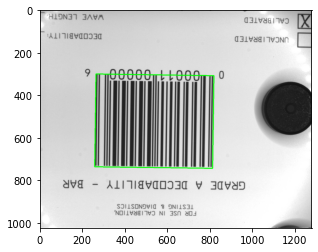

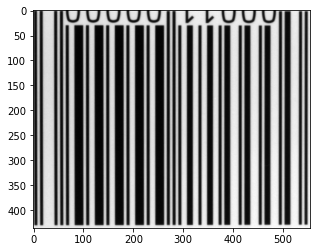

In [62]:
bound_box(f'../images/{images_paths[48]}')

[[267. 299.]
 [822. 306.]
 [262. 737.]
 [817. 744.]]


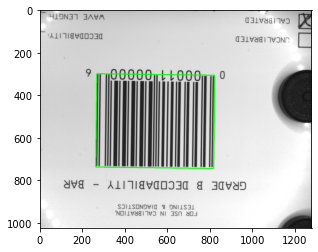

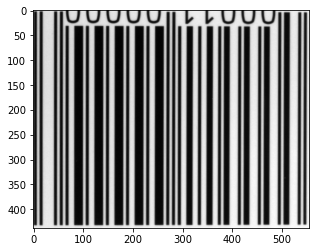

In [63]:
bound_box(f'../images/{images_paths[49]}')

[[292. 278.]
 [847. 286.]
 [285. 714.]
 [840. 722.]]


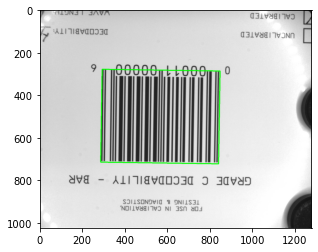

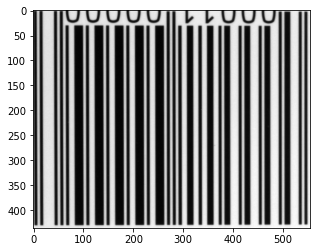

In [64]:
bound_box(f'../images/{images_paths[50]}')

[[294. 288.]
 [849. 295.]
 [288. 725.]
 [843. 732.]]


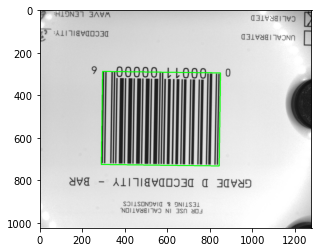

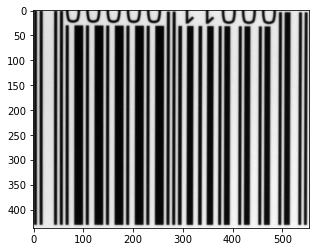

In [65]:
bound_box(f'../images/{images_paths[51]}')

[[307. 291.]
 [861. 291.]
 [307. 727.]
 [861. 727.]]


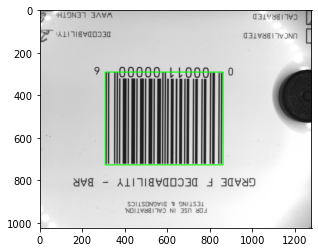

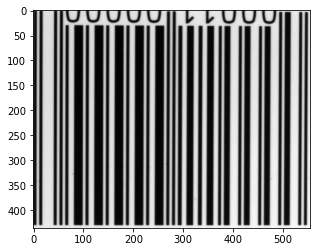

In [66]:
bound_box(f'../images/{images_paths[52]}')

[[109.  42.]
 [244.  42.]
 [109. 143.]
 [244. 143.]]
Wall time: 83.1 ms


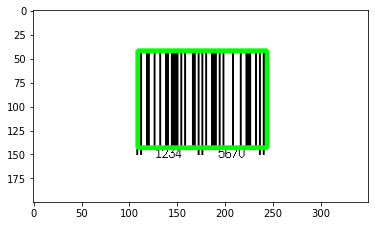

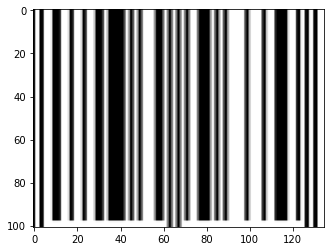

In [67]:
%%time
bound_box('other images/1.png')